In [28]:
import cv2
import imutils
from imutils import contours,perspective
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance as dist
import time

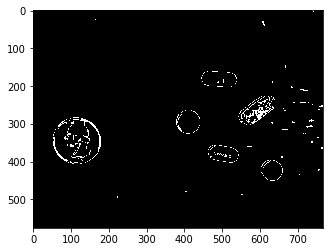

In [29]:
img = cv2.imread("test_image/size.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
blur = cv2.GaussianBlur(gray,(5,5),0)

edged = cv2.Canny(blur,50,100)
edged = cv2.dilate(edged,None,iterations=1)
edged = cv2.erode(edged,None,iterations=1)
plt.imshow(edged,cmap="gray")

cnt = cv2.findContours(edged.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt = imutils.grab_contours(cnt)

In [30]:
(cnt,_) = contours.sort_contours(cnt)

In [31]:
def midpoint(ptA, ptB):
     return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [32]:
pixelsPerMetric= None
for c in cnt:
    if cv2.contourArea(c)<100:
            continue
    orig = img.copy()      
    rec = cv2.minAreaRect(c)
    rec = cv2.boxPoints(rec)
    rec = np.array(rec,dtype="int")
    box = perspective.order_points(rec)
    cv2.drawContours(orig,[box.astype("int")],-1,(0,0,255),2)
    for (x,y) in box:
        cv2.circle(orig,(x,y),4,(255,0,0),-1)
    (tl,tr,br,bl) = box
    
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)
    
    cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
    
    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),(255, 0, 255), 2)
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),(255, 0, 255), 2)
    
    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
    
    if pixelsPerMetric is None:
        pixelsPerMetric = dB / .995
        
    
    dimA = dA / pixelsPerMetric
    dimB = dB / pixelsPerMetric
    
    cv2.putText(orig, "{:.1f}in".format(dimB),(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,0.65, (255, 255, 255), 2)
    cv2.putText(orig, "{:.1f}in".format(dimA),(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,0.65, (255, 255, 255), 2)
 
    cv2.imshow("display",orig)
    
    
    cv2.waitKey(0)
   

   
cv2.destroyAllWindows()


        
        